<a href="https://colab.research.google.com/github/vibferreira/machine_learning_2021_UBS/blob/main/Lab2_BagRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB SESSION 1 - Bagging and Random Forests

# Utils

In [ ]:
#conda install -c conda-forge scikit-learn, pandas 

In [ ]:
#conda install seaborn

## Ex 1: comparison between CART, bagging and random forests 

We work with the "Urban Land Cover" Machine learning data base (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover). There are a test and a train set. These data sets are used for automated mapping of urban land cover (trees, grass, soil, concrete, asphalt, buildings, etc.) in satellite or aerial imagery. 9 types of urban land cover are considered and multi-scale spectral, size, shape, and texture information are use for classification. There are a low number of training samples for each class (14-30) and a high number of classification variables (148). The test set is from a random sampling of the image.

Before to start, we: 
 - load the data and look at them (display the dimension and some descriptive statistics) 
 - select the variables that we will use in the exercise, 


In [ ]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
ulc_train = pd.read_csv("ULC_training.csv") 
ulc_train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [ ]:
print(ulc_train.shape)
print(ulc_train.describe())
print(ulc_train['class'].value_counts())

(168, 148)
          BrdIndx         Area       Round      Bright     Compact  \
count  168.000000   168.000000  168.000000  168.000000  168.000000   
mean     2.008512   565.869048    1.132976  165.569821    2.077679   
std      0.634807   679.852886    0.489150   61.883993    0.699600   
min      1.000000    10.000000    0.020000   37.670000    1.000000   
25%      1.537500   178.000000    0.787500  133.977500    1.547500   
50%      1.920000   315.000000    1.085000  164.485000    1.940000   
75%      2.375000   667.000000    1.410000  221.895000    2.460000   
max      4.190000  3659.000000    2.890000  244.740000    4.700000   

          ShpIndx      Mean_G      Mean_R    Mean_NIR        SD_G  ...  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  ...   
mean     2.229881  161.577083  163.672440  171.459226   10.131369  ...   
std      0.703572   63.407201   71.306748   67.973969    5.179409  ...   
min      1.060000   30.680000   32.210000   40.120000    4.330

In [ ]:
ulc_test = pd.read_csv("ULC_testing.csv") 
print(ulc_test.head())
print(ulc_test.shape)

       class  BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  \
0  concrete      1.32   131   0.81  222.74     1.66     2.18  192.94  235.11   
1    shadow      1.59   864   0.94   47.56     1.41     1.87   36.82   48.78   
2    shadow      1.41   409   1.00   51.38     1.37     1.53   41.72   51.96   
3      tree      2.58   187   1.91   70.08     3.41     3.11   93.13   55.20   
4   asphalt      2.60   116   2.05   89.57     3.06     3.02   73.17   94.89   

   Mean_NIR  ...  SD_NIR_140  LW_140  GLCM1_140  Rect_140  GLCM2_140  \
0    240.15  ...       31.15    5.04       0.80      0.58       8.56   
1     57.09  ...       12.01    3.70       0.52      0.96       7.01   
2     60.48  ...       18.75    3.09       0.90      0.63       8.32   
3     61.92  ...       27.67    6.33       0.89      0.70       8.56   
4    100.64  ...       32.05    1.01       0.83      0.75       8.62   

   Dens_140  Assym_140  NDVI_140  BordLngth_140  GLCM3_140  
0      0.82       0.98   

In [ ]:
# (2) Select the variables that we be used 
target_column = "class" # The response variable that we will consider
features_columns = list(ulc_train)
features_columns.remove('class') # The predictors/features used to predict the target
#print(target_column)
print(features_columns)

['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G', 'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect', 'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3', 'BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40', 'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40', 'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 'GLCM2_40', 'Dens_40', 'Assym_40', 'NDVI_40', 'BordLngth_40', 'GLCM3_40', 'BrdIndx_60', 'Area_60', 'Round_60', 'Bright_60', 'Compact_60', 'ShpIndx_60', 'Mean_G_60', 'Mean_R_60', 'Mean_NIR_60', 'SD_G_60', 'SD_R_60', 'SD_NIR_60', 'LW_60', 'GLCM1_60', 'Rect_60', 'GLCM2_60', 'Dens_60', 'Assym_60', 'NDVI_60', 'BordLngth_60', 'GLCM3_60', 'BrdIndx_80', 'Area_80', 'Round_80', 'Bright_80', 'Compact_80', 'ShpIndx_80', 'Mean_G_80', 'Mean_R_80', 'Mean_NIR_80', 'SD_G_80', 'SD_R_80', 'SD_NIR_80', 'LW_80', 'GLCM1_80', 'Rect_80', 'GLCM2_80', 'Dens_80', 'Assym_80', 'NDVI_80', 'BordLngth_80', 'GLCM3_80', 'BrdIndx_100', 'Area_1

In [ ]:
# Splitting the dataset
data, target = ulc_train[features_columns], ulc_train[target_column]
data_test, target_test = ulc_test[features_columns], ulc_test[target_column]

**Question 1. Fit a random forest on the training set to explain the type of soil (variable class) according to multi-scale spectral, size, shape, and texture information. You will use the values for $n\_estimatorsmax = 500 $ and $ max\_features= \sqrt(d)$ with $d$ denoting the number of features, $oob\_score=True$  and $random\_state=0$. Remind the meaning of $n\_estimators $ and $ max\_features$. Compute the oob score and explain. What does it represent ?**


##----- You can write your answer here or on a paper as well-----##

The OOB represents the samples, not selected by the bootstrap aggregation step, that were later given to the model as unseen data. The model then predicts the label of those samples using all the trees that have not seen that data before and return a majority of vote of the prediction. The OBB score ilustrates the proportion of samples that were correctly classified by the final decision of the model. Since it is based on data not used to build the model, it is an useful metrics to measure the accuracy of the classification.

In [ ]:
# Splitting the dataset
# data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0, test_size=0.25)

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: 
## - import RandomForestClassifier from sklearn.ensemble
## - see the documentation about random forest classifier with scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Step 1: create the object rfc, it is a RandomForestClassifier object with n_estimators=500, max_features='auto' and random_state=0
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=0, oob_score=True)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
rfc.fit(data,target)

# Step 3: look at the parameters used by your forest
from pprint import pprint
print('Parameters of the forest:\n')
pprint(rfc.get_params())
print('\n')

# Step 4: print the oob_score (attributes of rfc named oob_score_)
# .....
print('OBB score', rfc.oob_score_)
print('Accuracy score: ', rfc.score(data_test,target_test))

Parameters of the forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


OBB score 0.8452380952380952
Accuracy score:  0.8086785009861933


**Question 2. Predict the class of each observation of the test sample by using the random forest $\mathtt{rfc}$ and display the confusion matrix. Comment it. How many observations are misclassified ? Compute the accuracy.**

##----- You can write your answer here or on a paper as well-----##

97 out of 507 samples were misclassfied, with an accuracy score of approximately 80.86%. Accuracy score and OOB score are computed differently and therefore may not be exactly similar. The Accuracy score was computed using the test dataset which is then tested in all the trees of the model. On the other hand, OOB is computed using only the trees that did not see those samples before, which may help reducing variance and therefore returning a better accuracy than than the accuracy score. 

In [ ]:
# (97/507*100)-100

In [ ]:
import numpy as np
# Number of misclassified samples
def correct_incorrect_samples(cm,df):
    total_samples = len(df)
    correctly_class= np.diagonal(cm).sum()
    print('Correctly classified samples: ', correctly_class)
    print('Misclassified samples:', total_samples - correctly_class)

correct_incorrect_samples(cm, target_test)

Correctly classified samples:  410
Misclassified samples: 97


0.8086785009861933


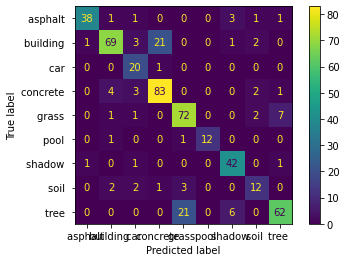

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: compute the predictions
predictions_test = rfc.predict(data_test) 
#print(predictions_test)

# Step 2: display the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=target_test, y_pred=predictions_test) # define the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_) # display the confusion matrix
disp.plot() 

# Step 3: compute the accuracy
correct_incorrect_samples(cm, target_test)
accuracy = rfc.score(X=data_test,y=target_test);print('Accuracy score', accuracy) 

We will now focus on the calibration of some RF parameters: $n\_estimators$ and $max\_features$. To calibrate these parameters, we will used the OOB errors.

**Question 3.  The code below shows how the OOB error can be measured at the addition of each new tree during training. The resulting plot can be used to approximate a suitable value of $n\_estimators$ at which the OOB error stabilizes. Comment this plot. What value for $n\_estimators$ does it seem suitable ?**

##----- You can write your answer here or on a paper as well-----##

The plot shows the OOB error as a function of the number of trees. A lower number of trees is leading to high variablity in the error, which decreases and stabilises as the number of trees increase. The OBB error stabilizes around 0.16 with n_estimators (number of trees) around 600, with a small variation at around 750.

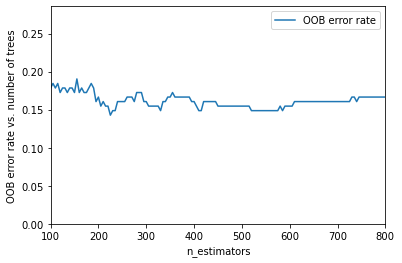

In [ ]:
import matplotlib.pyplot as plt

RANDOM_STATE = 0


# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = []

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 800
step=5

for i in range(min_estimators, max_estimators+1, step):
    rf = RandomForestClassifier(warm_start=True, n_estimators=i, max_features='auto',random_state=RANDOM_STATE, oob_score=True)
    rf.fit(data, target)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)
  

# Plot Generate the "OOB error rate" vs. "n_estimators" plot

plt.plot(range(min_estimators, max_estimators +1, step), error_rate, label="OOB error rate")

plt.ylim(0, 1.5*max(error_rate)) 
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate vs. number of trees")
plt.legend(loc="upper right")
plt.show()


In [ ]:
##----- You can write your answer here or on a paper as well-----##
# OOB score is the OBB error (1-OOB score)
# OOB error is a bit more optmistic because the trees are correlated

**Question 4. Now, we will repeat 10 times a 3-fold cross validation with the function GridSearchCV to calibrate at the same time the parameters $n\_estimators$ and $max\_features$. Comment the result and next build a forest using the best values for the parameters $n\_estimators$ and $max\_features$. Compute the accuracy on the test set and display the confusion matrix. Compare the performance of this forest with the previous one.**

In [ ]:
# Step 1: create a grid with all the values that we will considers for the two paramters
grid = {
    'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'n_estimators':[200,400,600,800]
}

# Step 2: use the grid to to search for the best couple of parameters
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier() # create the forest model to tune

B=10
results_cv=pd.DataFrame()
for i in range(B):
    rf_cv = GridSearchCV(estimator=rf,param_grid=grid, cv=3,n_jobs=-1)# Search the best values for the parameters using 3-fold cross validation, and use all available cores(n_jobs=-1)
    rf_cv.fit(data, target) # Fit the CV search
    if i==0: 
        results_cv=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
    else:
        results_cv["mean_test_score"]=results_cv["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
        results_cv["std_test_score"]=results_cv["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"]  
        
        

results_cv["mean_test_score"]=results_cv["mean_test_score"]/B
results_cv["std_test_score"]=results_cv["std_test_score"]/B 


# Step 3: get the best parameters (with the higher performance)
ind_best=results_cv["mean_test_score"].idxmax()
print(results_cv["params"].iloc[ind_best])
print(results_cv["mean_test_score"].iloc[ind_best])
print(results_cv["std_test_score"].iloc[ind_best])
results_cv

{'max_features': 0.1, 'n_estimators': 600}
0.8375
0.03618441981982034


,params,mean_test_score,std_test_score
0,"{'max_features': 0.1, 'n_estimators': 200}",0.829167,0.036518
1,"{'max_features': 0.1, 'n_estimators': 400}",0.829762,0.036332
2,"{'max_features': 0.1, 'n_estimators': 600}",0.837500,0.036184
3,"{'max_features': 0.1, 'n_estimators': 800}",0.837500,0.037117
4,"{'max_features': 0.2, 'n_estimators': 200}",0.829762,0.042963
5,"{'max_features': 0.2, 'n_estimators': 400}",0.828571,0.041051
6,"{'max_features': 0.2, 'n_estimators': 600}",0.832143,0.037131
7,"{'max_features': 0.2, 'n_estimators': 800}",0.830952,0.040075
8,"{'max_features': 0.3, 'n_estimators': 200}",0.835119,0.033922
9,"{'max_features': 0.3, 'n_estimators': 400}",0.832738,0.040152


**Question 5. Build a forest using the best values for the parameters $n\_estimators$ and $max\_features$. Compute the accuracy on the test set and display the confusion matrix. Compare the performance of this forest with the previous one.**

##----- You can write your answer here or on a paper as well-----##

With the changes on the parameter values the accuracy score experienced a slight improvement from around 80.86% to around 81.45%, with 3 less samples misclassified. 

0.814595660749507


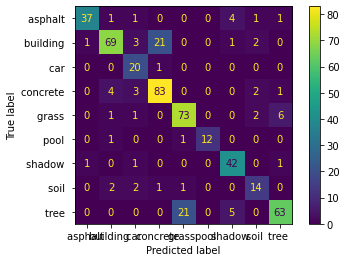

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: fit a random forest with the best values for parameters
best_rfc = RandomForestClassifier(n_estimators=800, max_features=0.1,oob_score=True,random_state=0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
best_rfc.fit(data,target)

# Step 3: compute the accuracy and the confusion matrix
predictions_test_2 = best_rfc.predict(data_test) 
cm_2 = confusion_matrix(target_test, predictions_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=best_rfc.classes_)
disp.plot() 

# Step 4: compute the accuracy
accuracy_2 = best_rfc.score(data_test,target_test)
print(accuracy_2)

In [ ]:
correct_incorrect_samples(cm_2,target_test)

Correctly classified samples:  413
Misclassified samples: 94


In [ ]:
best_rfc.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

**Question 6. what value for $max\_features$ we have to use if we want to apply the bagging algorithm ? Build this model and compute the prediction error of this model based on the test set. Compare this model with the two previous random forests. We will call this model $bag$.**

##----- You can write your answer here or on a paper as well-----##

The bag tree has the lowest accuracy score in comparison with the previous random forest models, misclassifing 108 samples. 

In [ ]:
# import math
# max_features = round(math.sqrt(len(features_columns)))
# print('Sqrt of number of features:', max_features)

In [ ]:
# len(features_columns)*0.1

0.7869822485207101


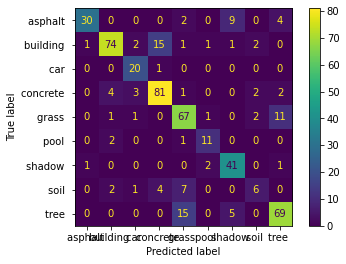

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: fit a a bagging model (use the best value for n_estimators)
bag = RandomForestClassifier(n_estimators=800, max_features=1,oob_score=True,random_state=0)

# Step 2: build the random forest on the train set by indicating the input data and the target variable 
bag.fit(data, target)

# # Step 3: compute the accuracy and the confusion matrix
predictions_test_bag = bag.predict(data_test) 
cm_bag = confusion_matrix(target_test, predictions_test_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bag,display_labels=bag.classes_)
disp.plot() 

# # Step 4: compute the accuracy
accuracy_bag = bag.score(data_test,target_test)
print(accuracy_bag)

In [ ]:
correct_incorrect_samples(cm_bag, target_test)

Correctly classified samples:  399
Misclassified samples: 108


In [ ]:
bag.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

**Question 7. Fit a maximal CART tree on the training set. Compute the prediction error of this tree based on the test set. name this tree $single\_tree$.**

*Indication: to get the maximal tree, use max_depth=None (the default value).*

0.717948717948718


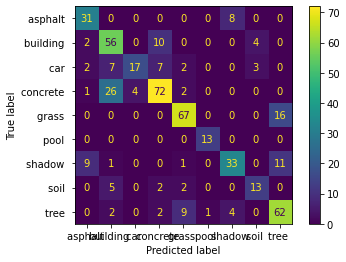

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: see TP1

# Step 1: Fit the maximum tree with random_state=0
from sklearn.tree import DecisionTreeClassifier, plot_tree
single_tree = DecisionTreeClassifier(random_state=0)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
single_tree.fit(data, target)

# # Step 3: compute the accuracy and the confusion matrix
predictions_test_tree = single_tree.predict(data_test)
cm_tree = confusion_matrix(predictions_test_tree,target_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=single_tree.classes_)
disp.plot() 

# ste 4: compute the accuracy on the test set
accuracy_tree = single_tree.score(data_test, target_test)
print(accuracy_tree)

In [ ]:
## Solution
print(single_tree.tree_.node_count);
print(single_tree.tree_.children_left)
print(single_tree.tree_.children_right)
print(single_tree.tree_.impurity)
print(single_tree.tree_.threshold)
# Avoir toutes la meilleure coupure pour chaque variable possible ?

35
[ 1  2 -1  4  5 -1  7 -1 -1 10 11 12 -1 -1 15 16 17 -1 -1 -1 21 -1 -1 -1
 25 26 -1 -1 29 30 -1 32 -1 -1 -1]
[24  3 -1  9  6 -1  8 -1 -1 23 14 13 -1 -1 20 19 18 -1 -1 -1 22 -1 -1 -1
 28 27 -1 -1 34 31 -1 33 -1 -1 -1]
[0.8801729  0.84536862 0.         0.818      0.48611111 0.
 0.16528926 0.         0.         0.73614958 0.6509003  0.1472
 0.         0.         0.54475309 0.24380165 0.44444444 0.
 0.         0.         0.24489796 0.         0.         0.
 0.59522962 0.42       0.         0.         0.22038567 0.1207076
 0.         0.44444444 0.         0.         0.        ]
[ 5.49999997e-02 -1.90000005e-01 -2.00000000e+00  9.85349998e+01
 -9.50000025e-02 -2.00000000e+00  4.45000008e-01 -2.00000000e+00
 -2.00000000e+00  1.18800001e+01  2.02999997e+00  1.16800000e+03
 -2.00000000e+00 -2.00000000e+00 -6.49999995e-02  3.94999996e-01
  1.42000002e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
  5.38000000e+02 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
  1.40395004e+02  7.15449982

**Question 8. Make a comparison between the bagging model $bag$, the single and maximal tree $single\_tree$ and the optimized random forest $best\_rfc$. What model do you choose and why ?**

##----- You can write your answer here or on a paper as well-----##

My choice is the best_rfc model because it is based on prunned parameters. Meaning that the model was optmized based on the minimization and stabilization of the OOB error and the optimal number of features used per tree in each split. Despite of the high accuracy, the single tree model does not generalise as good as a random forest model completly new data, despite of being more sensitive to noise in the dataset. 

what to say about the bag tree?

**Question 9. Comment the plot. What does it represent ?**

The code below show the permutation feature importance computed on the test set. The permutation feature importance score is independently computed $n\_repeats$ times (using each time another permutation of each feature). The final feature importance score corresponds to the mean over the $n\_repeats$ computations.

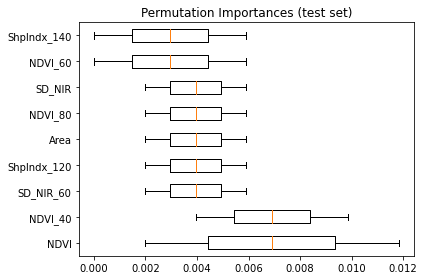

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_rfc, data_test, target_test, n_repeats=2, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
invert_sorted_idx=sorted_idx[::-1][:9]

fig, ax = plt.subplots()
ax.boxplot(result.importances[invert_sorted_idx].T,
           vert=False, labels=data_test.columns[invert_sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## Ex 2: introduction to regression trees

Here, we consider the dataset named *srbct_data*. It is relative to small round blue cell tumors of childhood. This set is composed of :

- a response factor of length 63, called class, indicating the class of each sample (4 classes in total).
- 2308 predictors. Each predictor represents the expression of one gene. The features are correlated. 

More information about the data are available on https://www.rdocumentation.org/packages/plsgenomics/versions/1.5-2/topics/SRBCT 

The table named *genes_name* contains the names of the genes and a description for each gene.

In [ ]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
srbct_data = pd.read_csv("cancer_data.csv")
genes_name = pd.read_csv("cancer_data_genes_names.csv")
srbct_data.head()

,class,21652,25725,26184,22260,22293,22493,23019,23132,24145,...,809513,504207,810448,810402,782503,795277,809383,809815,810483,503033
0,EWS,3.2025,0.0681,1.0460,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.7240,0.2044
1,EWS,1.6547,0.0710,1.0409,0.0520,0.2045,2.1609,2.4452,1.1473,0.7371,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.4140,1.2708,0.2990
2,EWS,3.2779,0.1160,0.8926,0.1014,0.2818,1.9773,3.2590,1.4106,0.9548,...,1.2674,1.5152,0.2382,0.8720,0.6819,0.3221,0.2156,0.3227,1.2142,0.2230
3,EWS,1.0060,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
4,EWS,2.7098,0.2367,0.3693,0.2190,0.3711,1.7800,3.2376,0.6769,0.8546,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157


In [ ]:
srbct_data.describe()

,21652,25725,26184,22260,22293,22493,23019,23132,24145,25584,...,809513,504207,810448,810402,782503,795277,809383,809815,810483,503033
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.499917,0.285963,0.973868,0.624049,0.301108,2.105405,5.077244,1.230895,1.29544,1.580010,...,0.772835,0.779162,0.324937,0.601719,0.903944,0.216938,0.241125,0.404775,0.692781,0.252010
std,0.894507,0.363846,0.647685,0.590634,0.170785,1.733135,2.296763,0.577145,0.61920,0.688737,...,0.430413,0.537537,0.241680,0.352051,0.669828,0.163477,0.193114,0.258727,0.349197,0.166489
min,0.068300,0.049400,0.157000,0.052000,0.040100,0.326900,2.172900,0.295800,0.52770,0.207600,...,0.102600,0.107900,0.058000,0.121600,0.052300,0.008200,0.004100,0.043000,0.067800,0.044600
25%,0.921900,0.088300,0.531350,0.119850,0.155650,1.091300,3.627900,0.725000,0.88420,1.053750,...,0.437450,0.445050,0.149950,0.359600,0.364850,0.090100,0.116650,0.249500,0.443950,0.136300
50%,1.276600,0.142300,0.892600,0.279600,0.297700,1.719900,4.527500,1.147200,1.14290,1.471900,...,0.747600,0.664900,0.249700,0.517400,0.736000,0.193700,0.181000,0.327600,0.651200,0.223000
75%,2.086300,0.267950,1.287950,1.265600,0.413800,2.570500,5.999400,1.549450,1.57720,2.000500,...,0.999600,0.973450,0.443250,0.700000,1.369000,0.301200,0.325000,0.420450,0.836950,0.298250
max,3.616500,1.924700,3.192300,1.792800,0.767400,11.620000,17.533000,2.602900,3.51070,3.072500,...,1.923500,3.601400,1.233900,1.800800,2.829700,0.812300,0.857900,1.562000,1.769100,1.042000


In [ ]:
genes_name.head()

,Image.Id.,Gene.Description
0,21652.0,"catenin (cadherin-associated protein), alpha 1..."
1,25725.0,farnesyl-diphosphate farnesyltransferase 1
2,26184.0,"phosphofructokinase, platelet"
3,22260.0,cytochrome c-1
4,22293.0,uroporphyrinogen III synthase (congenital eryt...


In [ ]:
# (2) Select the variables that we be used 
target_name = "class" # The response variable that we will consider
features_names = list(srbct_data)
features_names.remove('class') # The predictors/features used to predict the target
# print(target_column)
# print(features_columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder() 
y_encoded = ord_enc.fit_transform(srbct_data[[target_name]])


In [ ]:
# (3) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X, y = srbct_data[features_names], y_encoded.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25)

**Questions:**
 - 1) Build a random forest on this dataset using the default values for the RF parameters and all the features.
 - 2) Calibrate the two parameters ($n\_estimators$ and $max\_features$) using an approach based on either the oob error or cross validation.
 - 3) Build a second random forest using the calibrated values for the two parameters.
 - 4) Because there are lots of features and they are correlated, use the variable importance score to select a small subset of variables. Justify your choice.
 - 5) Build a third random forest based only the selected subset of features.
 - 6) Compare all these models with a logistic regression.

**Parameters tuning**

In [ ]:
##---- Write your answer ----##
# Classifier to tune
crf = RandomForestClassifier(random_state=42, oob_score=True)

# Cross validation with Grid Search
parameters = {'n_estimators': np.arange(50,500,50),
              'max_features': np.arange(0.1,1,0.1)}

grid_search = GridSearchCV(estimator=crf, cv=3, param_grid=parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Optimal params
print('Optimal params', grid_search.best_params_)
print('Best score', grid_search.best_score_ )
# print('OOB score', grid_search.oob_score_)

Optimal params {'max_features': 0.2, 'n_estimators': 50}
Best score 1.0


In [ ]:
tested_params = pd.DataFrame(grid_search.cv_results_)
tested_params.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.172525,0.007307,0.030914,0.001807,0.1,50,"{'max_features': 0.1, 'n_estimators': 50}",1.0,0.9375,1.0,0.979167,0.029463,27
1,0.320048,0.005027,0.035319,0.001731,0.1,100,"{'max_features': 0.1, 'n_estimators': 100}",1.0,0.9375,1.0,0.979167,0.029463,27
2,0.470637,0.004278,0.041086,0.007428,0.1,150,"{'max_features': 0.1, 'n_estimators': 150}",1.0,0.9375,1.0,0.979167,0.029463,27


Acuracy score 1.0
OOB score 0.9787234042553191


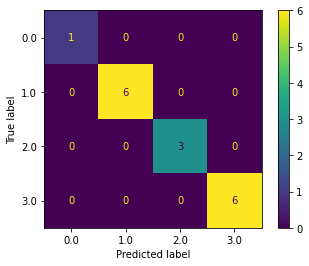

In [ ]:
best_n_estimator = grid_search.best_params_['n_estimators']
best_max_features = grid_search.best_params_['max_features']

crf_optim = RandomForestClassifier(n_estimators=500, max_features=best_max_features, random_state=42, oob_score=True)
crf_optim.fit(X_train, y_train)

y_pred = crf_optim.predict(X_test)

# Confusion matrix
cm_optim = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optim,display_labels=crf_optim.classes_)
disp.plot()

# Accuracy score
print('Acuracy score', crf_optim.score(X_test, y_test))
print('OOB score', crf_optim.oob_score_)

**Feature Importance**

In [ ]:
# Taking too much time to run

# result = permutation_importance(crf_optim, X_test, y_test, n_repeats=2, random_state=0, n_jobs=-1)
# sorted_idx = result.importances_mean.argsort()

# invert_sorted_idx=sorted_idx[::-1][:9]

# fig, ax = plt.subplots()
# ax.boxplot(result.importances[invert_sorted_idx].T,
#            vert=False, labels=data_test.columns[invert_sorted_idx])
# ax.set_title("Permutation Importances (test set)")
# fig.tight_layout()
# plt.show()

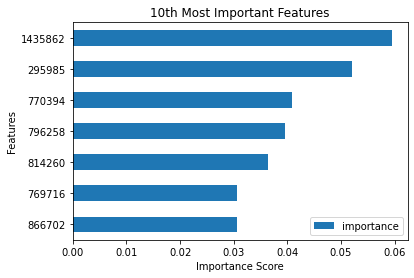

In [ ]:
feature_imp = pd.DataFrame(data= {'importance': crf_optim.feature_importances_,
                                  'name':srbct_data.columns[1:]}).sort_values(by=['importance'], ascending=False)
feature_imp.set_index('name',inplace=True)

# select the features with higher importance based on the model attribute feature_importance_
update_features_names= list(feature_imp[feature_imp.importance > 0.03].index)

viz = feature_imp[:len(update_features_names)]
viz.plot.barh().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("10th Most Important Features")
plt.legend()
plt.show()

In [ ]:
# Random Forest based on the selection of features 
X = srbct_data[update_features_names]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=42,test_size=0.25)

Acuracy score 0.9375
OOB score 0.9361702127659575


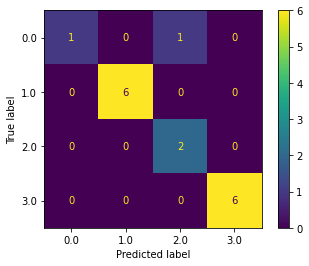

In [ ]:
crf_optim_feat = RandomForestClassifier(n_estimators=500, max_features=best_max_features, random_state=42, oob_score=True)
crf_optim_feat.fit(X_train_2, y_train_2)

y_pred_2 = crf_optim_feat.predict(X_test_2)

# # Confusion matrix
cm_feat = confusion_matrix(y_pred_2,y_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_feat,display_labels=crf_optim_feat.classes_)
disp.plot()

# Accuracy score
crf_optim_acc = crf_optim_feat.score(X_test_2, y_test_2)
print('Acuracy score', crf_optim_acc)
print('OOB score', crf_optim_feat.oob_score_)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(X_train_2, y_train_2)
y_pred_lr = lr.predict(X_test_2)

# Accuracy score
lr_acc = lr.score(X_test_2, y_test_2)
print('Logistic Regression Accuracy score: ', lr_acc)


Logistic Regression Accuracy score:  0.875


In [ ]:
# Plotting the model 
X_test_stand = (X_test_2-X_test_2.mean(axis=0))/X_test_2.std(axis=0) #standardise the features
X_test_stand['class']=y_pred_lr

# Range of X
min_x = np.sort(X_test_stand.min())[0]
max_x = np.sort(X_test_stand.max())[-1]

X_test_stand.head()

,1435862,295985,770394,796258,814260,769716,866702,class
61,0.192115,1.475286,-0.486508,0.078309,-0.547832,0.245946,-0.475810,3.0
57,-1.044654,-0.362486,-0.139421,-0.261476,-0.795568,0.246666,-0.635032,0.0
0,0.733217,-0.736340,1.412819,-0.664806,1.693507,-0.293119,1.709793,1.0
43,-0.173213,1.767637,-0.803555,0.575276,-0.815442,-0.177528,-0.630341,3.0
5,1.289672,-0.761223,1.046671,-0.478845,1.676923,-0.478568,1.386565,1.0


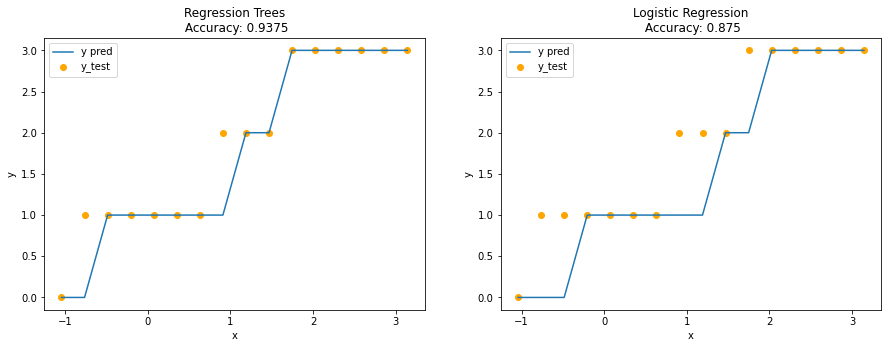

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
x = np.linspace(min_x,max_x,16)

# Regression Trees
ax1.scatter(x, np.sort(y_test_2), c='orange', label='y_test')
ax1.plot(x, np.sort(y_pred_2), label='y pred')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f'Regression Trees\n Accuracy: {crf_optim_acc}')
ax1.legend()

# Logistic Regression
ax2.scatter(x, np.sort(y_test_2), c='orange', label='y_test')
ax2.plot(x, np.sort(y_pred_lr), label='y pred')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(f'Logistic Regression\n Accuracy: {lr_acc}')
ax2.legend()

plt.show()

**FINAL COMMENTS:**

The parameter tuning and feature importance selection on Regression Trees helped on reducing the overfitting effect and therefore increasing the prediction capability of the model. The Final Pruned Regression Tree model had a better accuracy then the non-prunned Logistic Regression. However, since no pruning tecnique was applied on the Logistic Regression model, it is hard to tell if the Regression Tree performs better in general for this dataset. 